In [4]:
pip install pandas scikit-learn matplotlib


Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        87
           1       0.74      0.70      0.72        56

    accuracy                           0.78       143
   macro avg       0.77      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



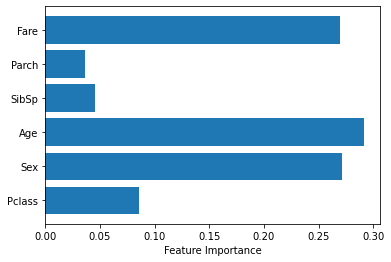

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Titanic dataset (you can download it from Kaggle or use a provided dataset)
# For this example, we assume you have a CSV file named "titanic.csv" with columns like 'Pclass', 'Sex', 'Age', 'Fare', etc.
data = pd.read_csv("titanic.csv")

# Data preprocessing
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = data.dropna()

X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print(classification_report(y_test, y_pred))

# Visualize feature importance (if applicable)
feature_importances = clf.feature_importances_
features = X.columns
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.show()
